In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [24]:
# create cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding = 'valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))



In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [27]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 111ms/step - loss: 1.0307 - accuracy: 0.5806 - val_loss: 0.7763 - val_accuracy: 0.5404
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5951 - accuracy: 0.6815 - val_loss: 0.6276 - val_accuracy: 0.6772
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4922 - accuracy: 0.7601 - val_loss: 0.5544 - val_accuracy: 0.7140
Epoch 4/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4167 - accuracy: 0.8076 - val_loss: 0.4259 - val_accuracy: 0.8044
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3316 - accuracy: 0.8522 - val_loss: 0.3183 - val_accuracy: 0.8664
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2432 - accuracy: 0.8972 - val_loss: 0.3437 - val_accuracy: 0.8546
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.1871 - accuracy: 0.9237 - val_loss: 0.3330 - val_ac

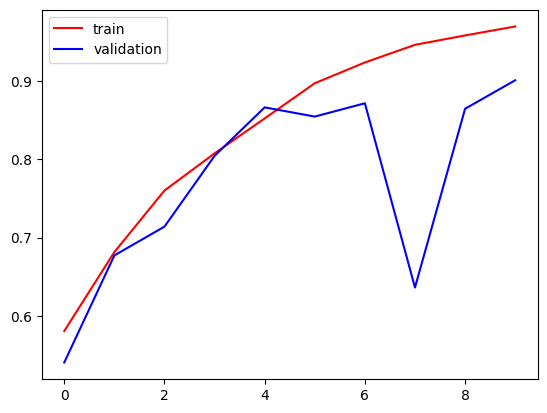

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

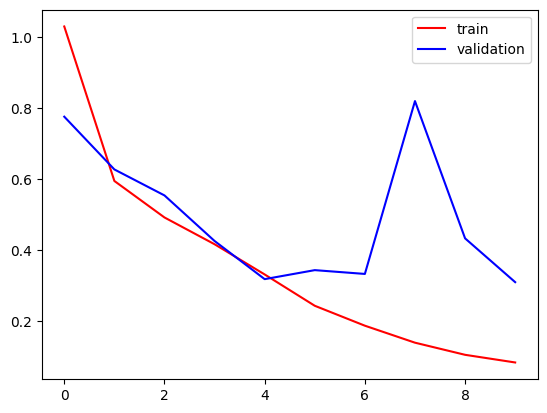

In [30]:
plt.plot(history.history['loss'], color =  'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [32]:
import cv2

In [33]:
test_img = cv2.imread('/content/cat.jpeg')

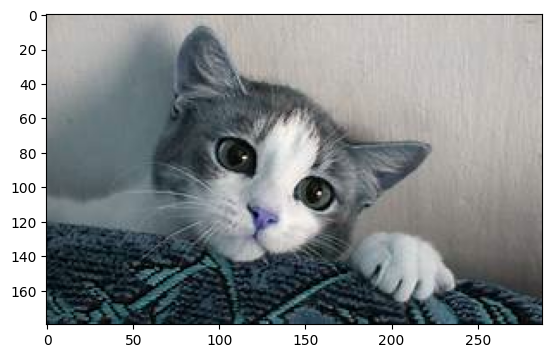

In [34]:
plt.imshow(test_img)

In [37]:
test_img.shape

(180, 288, 3)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 [==============================] - 1s 690ms/step


array([[0.]], dtype=float32)

In [42]:
test_img = cv2.imread('/content/kutta.jpg')

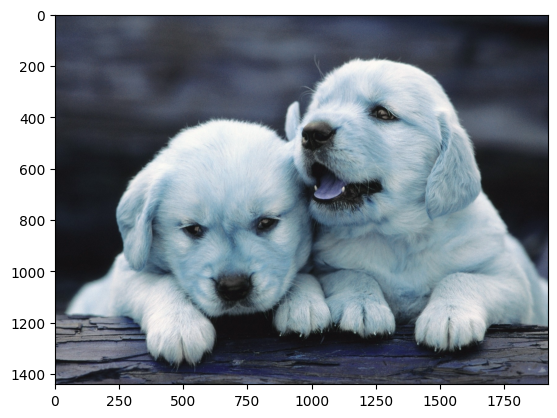

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(1440, 1920, 3)

In [48]:
test_img = cv2.resize(test_img, (256,256))

In [50]:
test_input = test_img.reshape((1, 256, 256, 3))


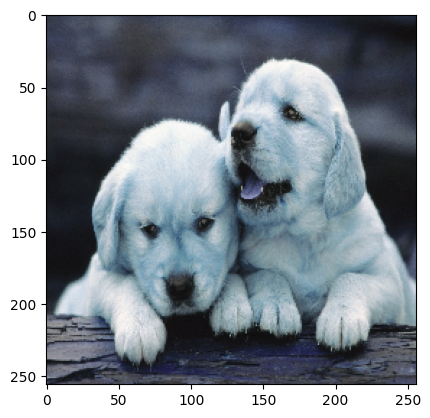

In [52]:
plt.imshow(test_img)

In [53]:
model.predict(test_input)

1/1 [==============================] - 0s 48ms/step


array([[1.]], dtype=float32)